# Dados coletados do experimento 

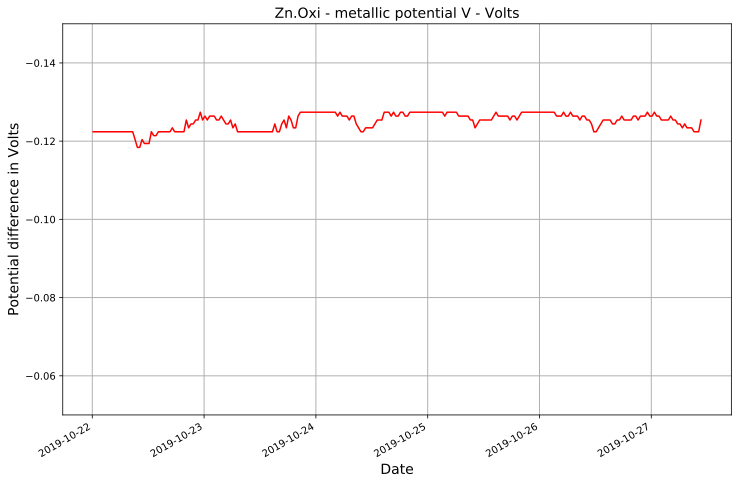

In [139]:
geraGrafico("Date", "Zn.Oxi - metallic potential V - Volts", solucao1, 6430, len(solucao1), -0.05, -0.150,
            minutos=30, cor='red')

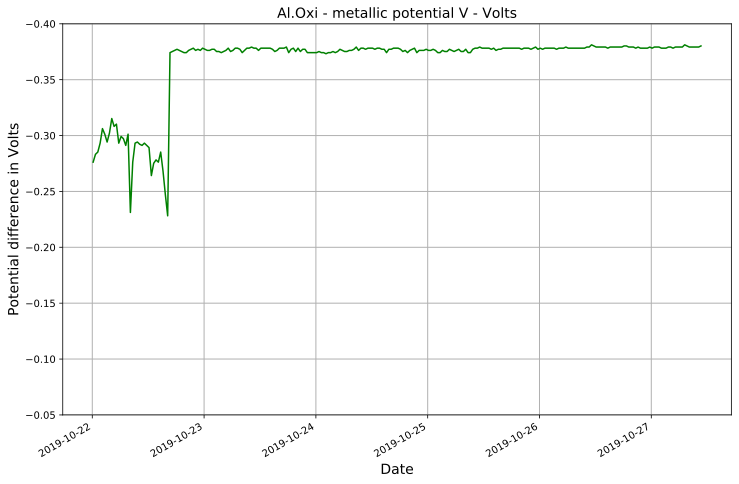

In [133]:
geraGrafico("Date", "Al.Oxi - metallic potential V - Volts", solucao2, 6430, len(solucao2), -0.05, -0.4, 
            minutos=30, cor='green')

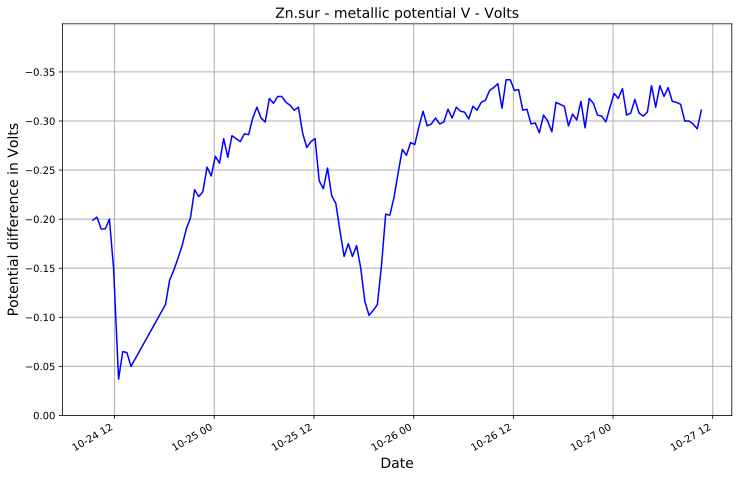

In [142]:
geraGrafico("Date", "Zn.sur - metallic potential V - Volts",solucao3, 6430, 
            len(solucao3), -0.00, solucao3.min()-0.05, minutos=30, cor='blue')

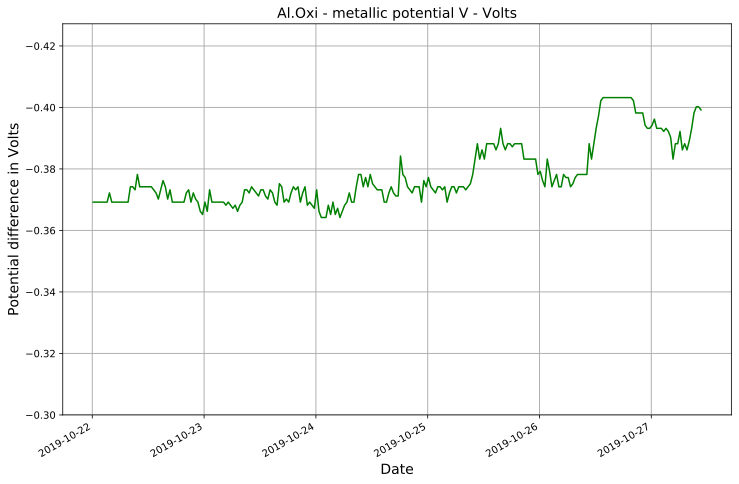

In [141]:
geraGrafico("Date", "Al.Oxi - metallic potential V - Volts", solucao4, 6430, len(solucao4), -0.30, 
            solucao4[100:].min(), minutos=30, cor='green')




# Programa

In [112]:
#Necessário para os gráficos

#DEBUG

%matplotlib inline
%config InlineBackend.figure_format='svg'

%config InlineBackend.rc={'figure.figsize': (12, 8)}

import pandas as pd
import numpy as np

from pandas.plotting import register_matplotlib_converters

import matplotlib.pyplot as plt

In [120]:
dados = pd.read_csv('DADOS.CSV', sep=',', header=None)

### Tratamento de dados, agregações e nova tabela

In [121]:
dados = dados.iloc[:, 0:10]

horas = []
for i in range(0, len(dados)):
    #Modelo: 2017-01-01 05:03 
    horas.append(("%d-%d-%d %d:%d:%d" %(dados[6][i], dados[5][i], 
                 dados[4][i], dados[7][i], dados[8][i], dados[9][i])))
    
dados = dados.iloc[:, 0:4]
horario = pd.to_datetime(horas)
dados = dados.join(pd.DataFrame(horario), how='outer', rsuffix=' ')
dados = dados.set_index('0 ')
dados.columns = ['Solucao 1', 'Solucao 2', 'Solucao 3', 'Solucao 4']
dados.index.name = 'Horario'


### Cálculo do potencial

##### Sequencia:
###### > Zinco
##### > Aluminio
###### > Zinco
###### > Aluminio


In [46]:
dados

Solucao 1  Solucao 2  Solucao 3  Solucao 4
Horario                                                        
2019-10-17 13:01:50     -0.335     -0.535     -0.780     -0.767
2019-10-17 13:02:00     -0.338     -0.541     -0.791     -0.787
2019-10-17 13:03:00     -0.366     -0.549     -0.823     -0.824
2019-10-17 13:04:00     -0.479     -0.572     -0.833     -0.831
2019-10-17 13:05:00     -0.557     -0.648     -0.836     -0.836
...                        ...        ...        ...        ...
2019-10-27 10:44:00     -0.823     -0.631     -0.645     -0.651
2019-10-27 10:45:00     -0.822     -0.631     -0.642     -0.651
2019-10-27 10:46:00     -0.823     -0.631     -0.648     -0.651
2019-10-27 10:47:00     -0.821     -0.631     -0.639     -0.650
2019-10-27 10:48:00     -0.822     -0.631     -0.652     -0.650

[14269 rows x 4 columns]

##### Adicionando OFFSET dos materiais

In [123]:
solucao1 = -0.9484 - dados.iloc[:, 0]
solucao2 = dados.iloc[:, 1] + 0.2518
solucao3 = -0.948 - dados.iloc[:, 2] 
solucao4 = dados.iloc[:, 3] + 0.2518 

solucao4[6500:]

Horario
2019-10-22 01:21:00   -0.3692
2019-10-22 01:22:00   -0.3692
2019-10-22 01:23:00   -0.3692
2019-10-22 01:24:00   -0.3692
2019-10-22 01:25:00   -0.3692
                        ...  
2019-10-27 10:44:00   -0.3992
2019-10-27 10:45:00   -0.3992
2019-10-27 10:46:00   -0.3992
2019-10-27 10:47:00   -0.3982
2019-10-27 10:48:00   -0.3982
Name: Solucao 4, Length: 7769, dtype: float64

##### Filtrando os ruídos

In [129]:
solucao3 = solucao3[(solucao3 <= -0.01)]

In [92]:
def geraGrafico(nomeX, titulo, solucao, dadosmin, dadosmax, 
                limY_inf=0, limY_sup=2.5, minutos=10, cor='red'):
    solucao = solucao.iloc[range(dadosmin, dadosmax, minutos)] 
    plt.title(titulo, fontsize=14)
    plt.xlabel(nomeX, fontsize=14)
    plt.ylabel("Potential difference in Volts", fontsize=14)
    
    plt.ylim(limY_inf, limY_sup)
    plt.grid(True, linewidth=1)
    plt.gcf().autofmt_xdate()
    plt.plot(solucao, color=cor)